In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

-Generate a frequency table for the product category.
-Which are the top 5 most listed product categories?

Visualizations:

-Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
-For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [32]:
#Generate a frequency table for the product category.

df_freq = df['category'].value_counts()
df_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [39]:
#Which are the top 5 most listed product categories?

top_5_cat = df_freq.head(5)
top_5_cat

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [40]:
df['category'].nunique()

296

In [41]:
top_10 = df_freq.head(10)
top_10

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

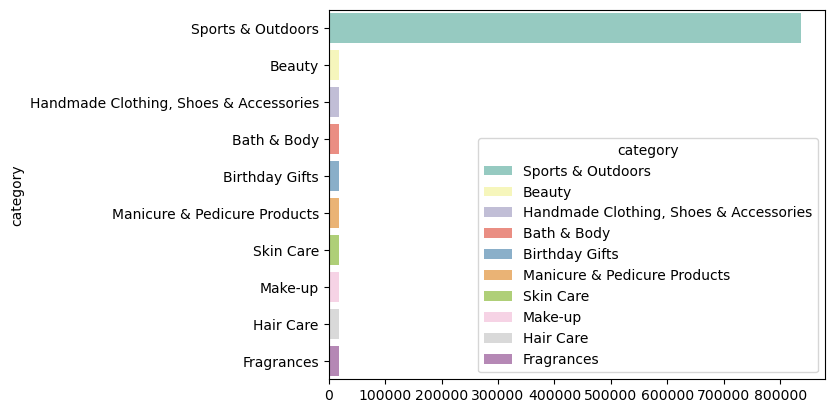

In [42]:
#Display the distribution of products across different categories using a bar chart.

ax=sns.barplot(y=top_10.index, x=top_10.values, palette="Set3", hue=top_10.index, legend='full')
sns.move_legend(ax, "lower right")

<Axes: ylabel='count'>

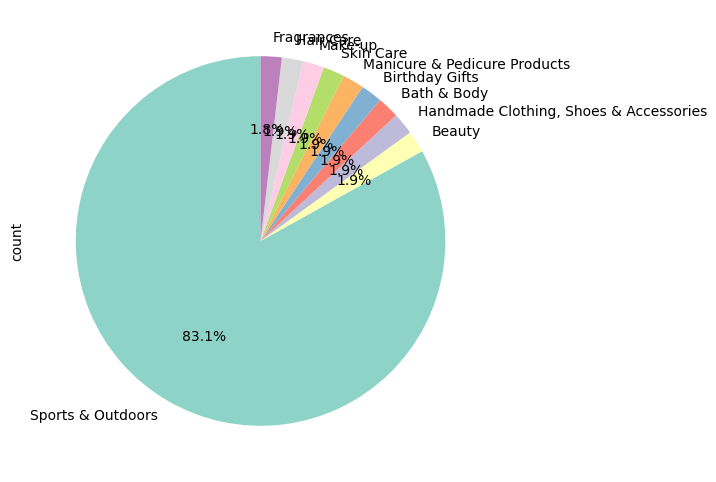

In [56]:
#For a subset of top categories, visualize their proportions using a pie chart. 
#Does any category dominate the listings?

top_10.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), figsize=(10, 6))

In [ ]:
#From the above pie chart we can see that "sports and outdoors" dominate the listings.

How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [58]:
#Calculate the mean, median, and mode for the price of products.

df['price'].mean()

89.24380943923663

In [59]:
df['price'].median()

19.09

In [61]:
df['price'].mode()[0]

9.99

In [63]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [ ]:
#What's the average price point of products listed? 
#How does this compare with the most common price point (mode)?

#What's the average price point of products listed? 


The average (mean) price point of products listed on Amazon UK is approximately £89.24. This value indicates the overall average cost of a product when you average out all the product prices in the dataset.

The mode of the products is 9.99 whereas the median value is 19.09

This indicates that most of the products listed on Amazon UK are of 9.99 but there are few products which are high priced and hence increases the overall average of the dataset.

In [72]:
#Determine the variance, standard deviation, range, and interquartile range for product price.

In [73]:
#variance

variance_price = df['price'].var()
variance_price

119445.48532256528

In [74]:
#standard deviation

std_deviation_price = df['price'].std()
std_deviation_price

345.60886175352226

In [75]:
#range

min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
range_price

100000.0

In [76]:
#interquartile range

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR

36.0

In [77]:
#How varied are the product prices? Are there any indicators of a significant spread in prices?

#Products are highly varied as the variance is high
#A range of £100,000 indicates an enormous span from the cheapest to the most expensive product
#An IQR of £36 suggests that the bulk of products are relatively clustered around a smaller price window

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

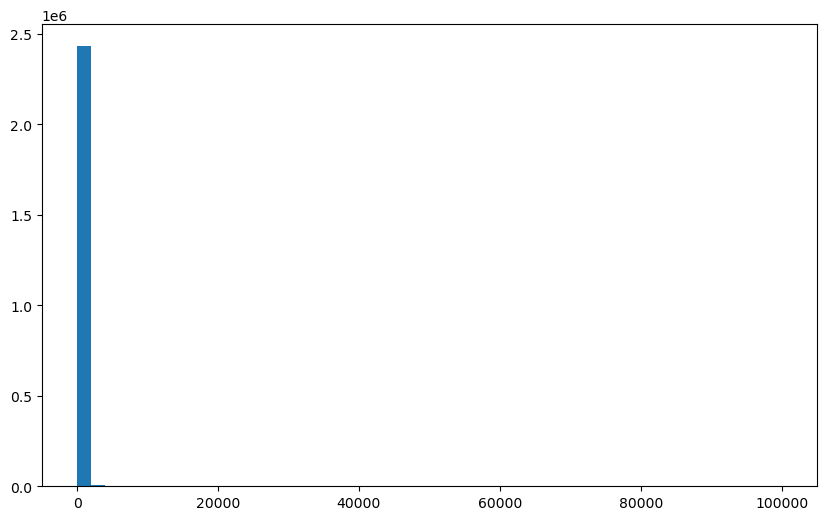

In [83]:
plt.figure(figsize=(10, 6))  
plt.hist(df['price'], bins=50) 

plt.show()

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price'>

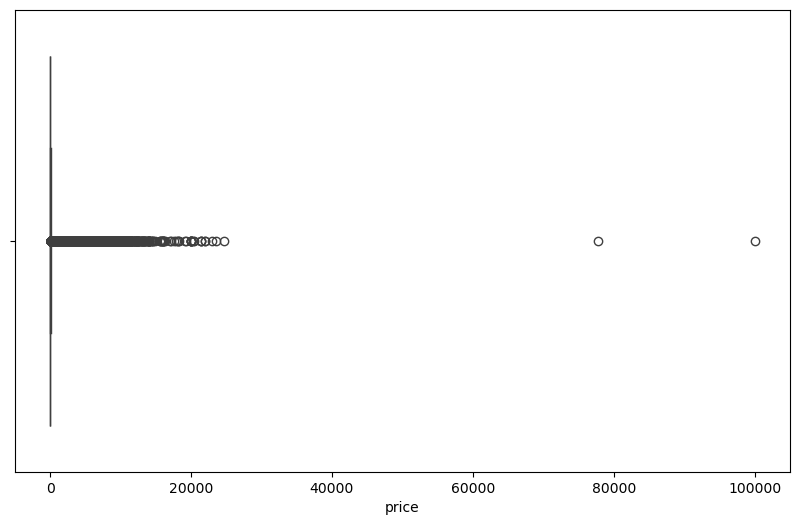

In [85]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
sns.boxplot(x=df['price'])

In [86]:
#How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [89]:
#Calculate the mean, median, and mode for the rating of products.

mean_rating = df['stars'].mean()

median_rating = df['stars'].median()

mode_rating = df['stars'].mode()[0]

# Print the calculated values
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


#
#How do customers generally rate products? Is there a common trend?

The mean rating of 2.15, when including products rated as 0, suggests a relatively low average rating among all products

The median and mode being 0 indicate that a large number of products have not received any ratings, or the data collection methodology has categorized unrated products with a 0.

In [90]:
#Determine the variance, standard deviation, and interquartile range for product rating.

In [94]:
#variance

variance_ratings = df['stars'].var()
variance_ratings

4.81743402976196

In [95]:
#standard_deviation

standard_deviation_ratings = df['stars'].std()
standard_deviation_ratings

2.1948653785054697

In [96]:
#IQR_ratings

Q1_ratings = df['stars'].quantile(0.25)
Q3_ratings = df['stars'].quantile(0.75)
IQR_ratings = Q3_ratings - Q1_ratings
IQR_ratings

4.4

A variance of 4.82 is relatively high. This suggests that ratings are spread out from the mean, indicating a wide variation in customer feedback.

An IQR of 4.4 is extensive, especially in the context of a 0-5 scale, suggesting that half of all ratings are spread across a wide range

The observed variance, standard deviation, and IQR, the product ratings exhibit a broad range of customer feedback, indicating wide variation rather than consistency.

In [ ]:
#Calculate the skewness and kurtosis for the rating column.

In [97]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

#A skewness of 0.081 indicates that there isn't a strong lean towards higher or lower values, meaning the ratings are fairly evenly distributed around the mean

#A kurtosis value of -1.926 indicates a distribution with fewer outliers and less extremity in the values than a normal distribution would exhibit.

#The ratings appear to be relatively symmetrical but not perfectly normal, owing to the platykurtic nature indicated by the negative kurtosis.

In [109]:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

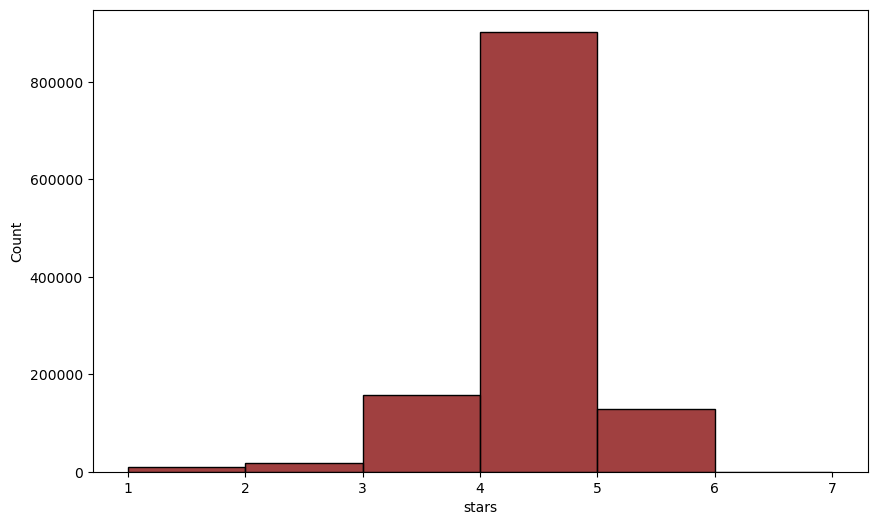

In [110]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed for clarity
sns.histplot(df['stars'], bins=range(1, 8), kde=False, color='maroon', edgecolor='black')